# Import necessary Python Modules

In [617]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
	

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

# DATA EXPLORATION

In [618]:
#loadindg the data set
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
#print first 5 rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [619]:
#print first 5 and last 5 rows of the dataset
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [620]:
#Data Summary
df.shape

(1599, 12)

In [621]:
#checking null values in dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

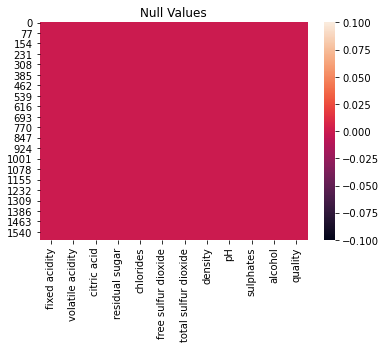

In [622]:
#Graphical representation of the null values
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [623]:
#find duplicates
df.duplicated().sum()

240

In [624]:
#drop duplicate data
df = df.drop_duplicates()
df = df.reset_index()

In [625]:
#checking shape: (1599,13) to (1359,13) 
df.shape

(1359, 13)

In [626]:
#checking null values in dataset
df.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [627]:
#Data Statistics
df.describe()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,792.693157,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,465.380840,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,388.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,785.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,1193.500000,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,1598.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#OUTCOME OF DESCRIBE IN DATASETS
From the above method we are determining mean, Standard Deviation, minimum & maximum value of each column. 
It helps us further in data cleaning.  
It can tell more about skewness & outliers in the data.

In [628]:
#CHECKING THE DATATYPES IN COLUMNS
df.dtypes

index                     int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [629]:
#all the columns
df.columns

Index(['index', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [630]:
#Unique class in quality 
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

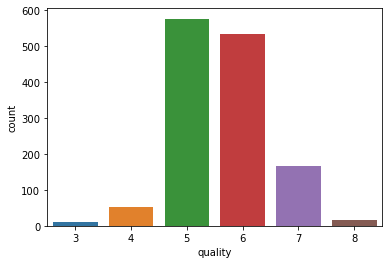

In [631]:
#count of each class 
ax=sns.countplot(x="quality", data=df)

# Defining Good & Bad Quality
1) Quality more than the value 5 = Good Quality (1)
2) Quality less than or equal to 5 = Bad Quality (0)

In [632]:
#In order to convert this into a classifiation problem, we define two qualities :- 1) Good and 0) Bad
#Defination is as follows Good>5 & Bad<=5.
df['quality'] = (df['quality']>5)
df['quality'] = df['quality'].astype(int)
df['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1354    1
1355    0
1356    1
1357    0
1358    1
Name: quality, Length: 1359, dtype: int32

In [633]:
#post conversion checking the null values
df['quality'].isnull().sum()

0

1    719
0    640
Name: quality, dtype: int64


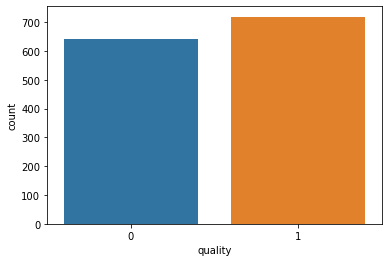

In [634]:
#Counts of each class (Good = 719) & (Bad=640)
ax=sns.countplot(x="quality", data=df)
print(df['quality'].value_counts())

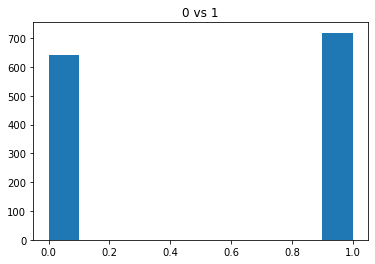

In [635]:
#Class imbalance checking
df["quality"].hist(grid=False)
plt.title("0 vs 1")
plt.show()

# There doesnt seem to be an imbalance in the dataset and hence we are good to go.

In [636]:
#Checking Correlation
df.corr()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
index,1.000000,-0.263999,-0.014721,-0.154419,-0.019472,-0.133904,0.077603,-0.134129,-0.374347,0.147029,-0.119986,0.271759,0.116503
fixed acidity,-0.263999,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.091761
volatile acidity,-0.014721,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.327195
citric acid,-0.154419,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.167903
residual sugar,-0.019472,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,-0.002371
chlorides,-0.133904,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.115071
free sulfur dioxide,0.077603,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.069207
total sulfur dioxide,-0.134129,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.235046
density,-0.374347,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.168958
pH,0.147029,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,0.004693


In [637]:
#Correlation with the target variable
corr_mat=df.corr()
corr_mat['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.446176
sulphates               0.211365
citric acid             0.167903
index                   0.116503
fixed acidity           0.091761
pH                      0.004693
residual sugar         -0.002371
free sulfur dioxide    -0.069207
chlorides              -0.115071
density                -0.168958
total sulfur dioxide   -0.235046
volatile acidity       -0.327195
Name: quality, dtype: float64

In [638]:
#correlation with target variable (absolute values)
corr_mat=np.abs(df.corr())
corr_mat['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.446176
volatile acidity        0.327195
total sulfur dioxide    0.235046
sulphates               0.211365
density                 0.168958
citric acid             0.167903
index                   0.116503
chlorides               0.115071
fixed acidity           0.091761
free sulfur dioxide     0.069207
pH                      0.004693
residual sugar          0.002371
Name: quality, dtype: float64

In [639]:
#Dropping two highly correlated columns
df = df.drop(['residual sugar','pH'],axis=1)

# DATA VISUALISATION

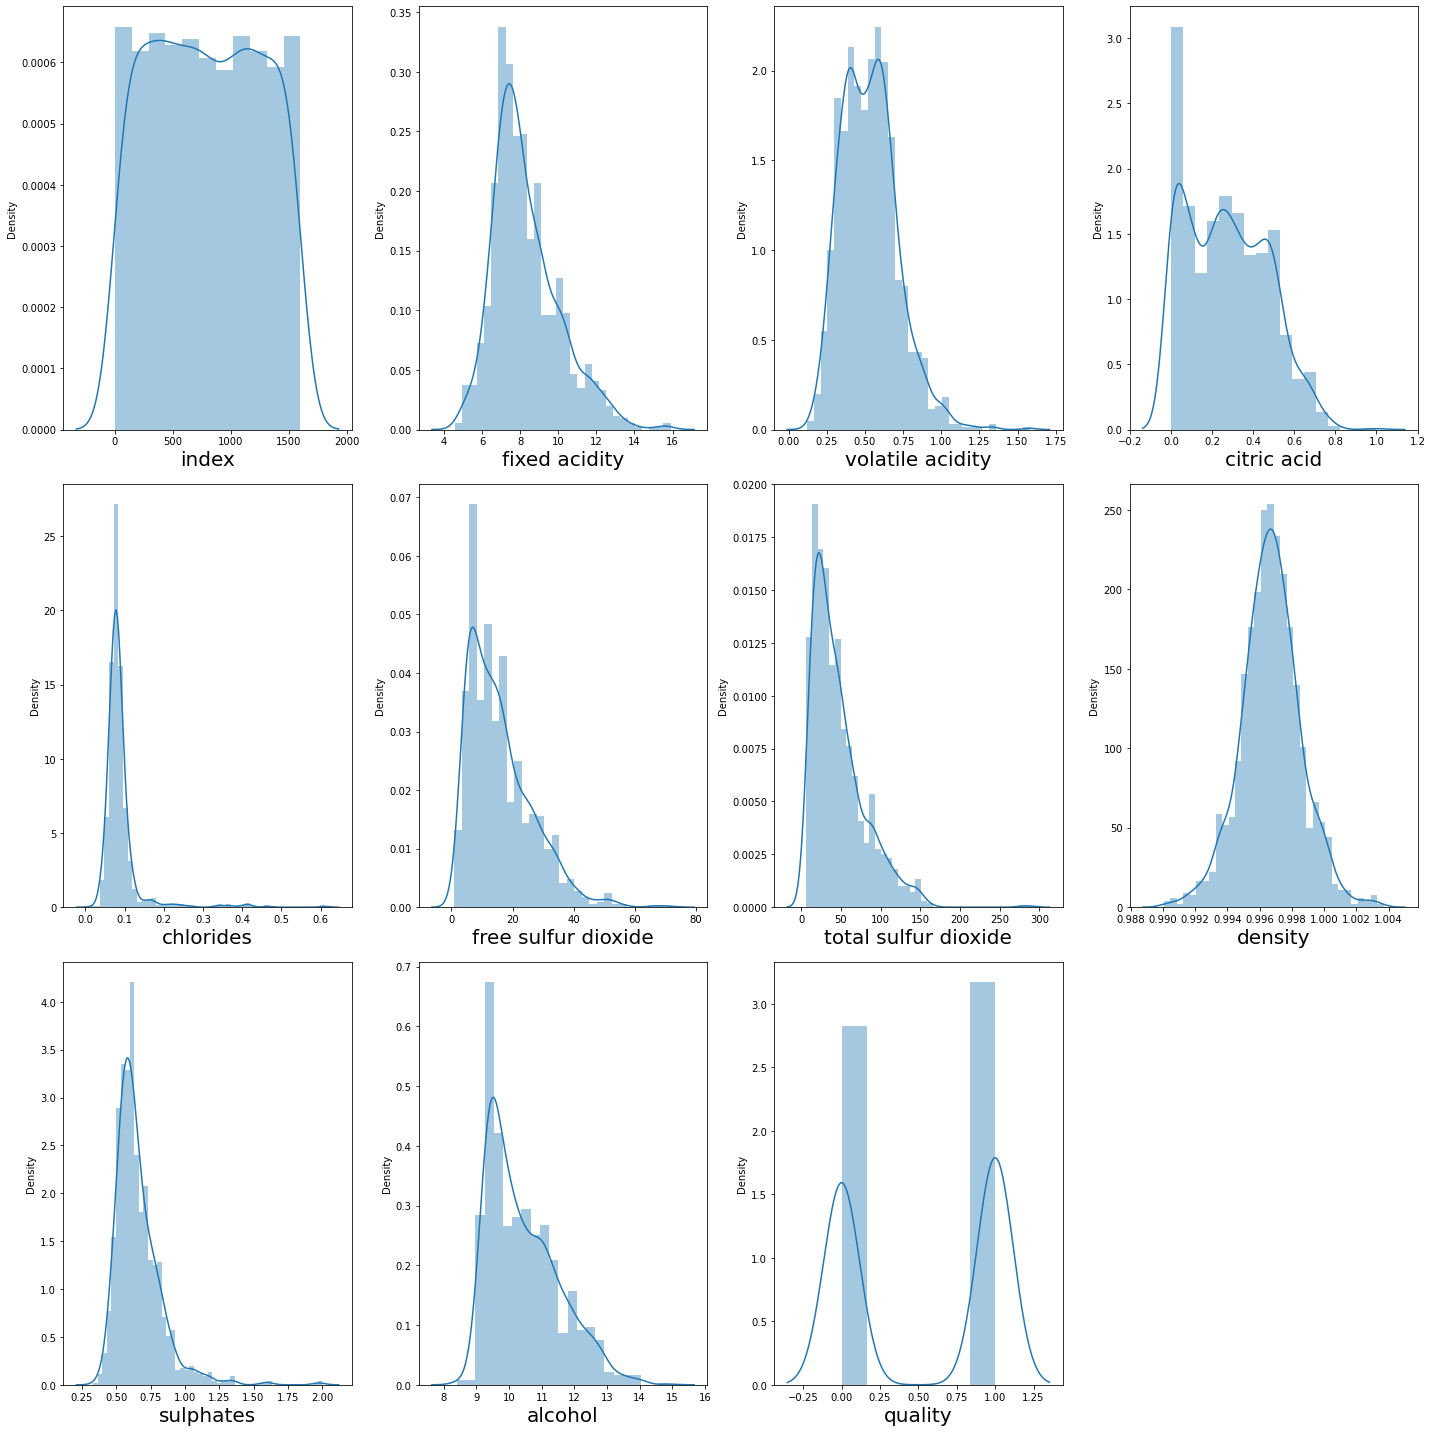

In [640]:
#Checking the skewness of the data (Visually)
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [641]:
#Checking skewness of each of the features
quality_column = df['quality']
df.skew().sort_values(ascending=False)

chlorides               5.502487
sulphates               2.406505
total sulfur dioxide    1.540368
free sulfur dioxide     1.226579
fixed acidity           0.941041
alcohol                 0.859841
volatile acidity        0.729279
citric acid             0.312726
density                 0.044778
index                   0.019475
quality                -0.116588
dtype: float64

In [642]:
#saved the original values of the target label
quality_column

0       0
1       0
2       0
3       1
4       0
       ..
1354    1
1355    0
1356    1
1357    0
1358    1
Name: quality, Length: 1359, dtype: int32

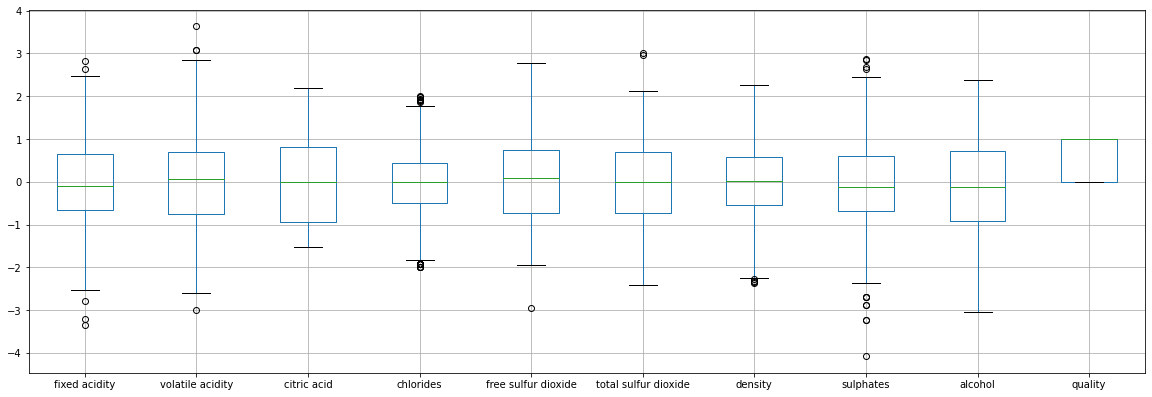

In [683]:
#chekcing the outliers through box plot
df.iloc[:,1:].boxplot(figsize=[20,8]) #plotting boxplot for first 30 columns 
plt.subplots_adjust(bottom=0.25)
plt.show()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [644]:
#We can see skewness in most of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
df_new = power_transform(df)
df=pd.DataFrame(df_new,columns=df.columns)
df.skew().sort_values(ascending=False) #validating that the skewness is removed

alcohol                 0.116742
citric acid             0.016563
sulphates               0.014637
volatile acidity        0.008311
fixed acidity           0.001884
density                -0.002812
total sulfur dioxide   -0.003897
free sulfur dioxide    -0.009899
chlorides              -0.061923
quality                -0.116588
index                  -0.288585
dtype: float64

In [645]:
#quality label after transformation
df['quality']

0      -1.059923
1      -1.059923
2      -1.059923
3       0.943464
4      -1.059923
          ...   
1354    0.943464
1355   -1.059923
1356    0.943464
1357   -1.059923
1358    0.943464
Name: quality, Length: 1359, dtype: float64

In [646]:
#giving quality label back its original values
df['quality'] = quality_column
df['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1354    1
1355    0
1356    1
1357    0
1358    1
Name: quality, Length: 1359, dtype: int32

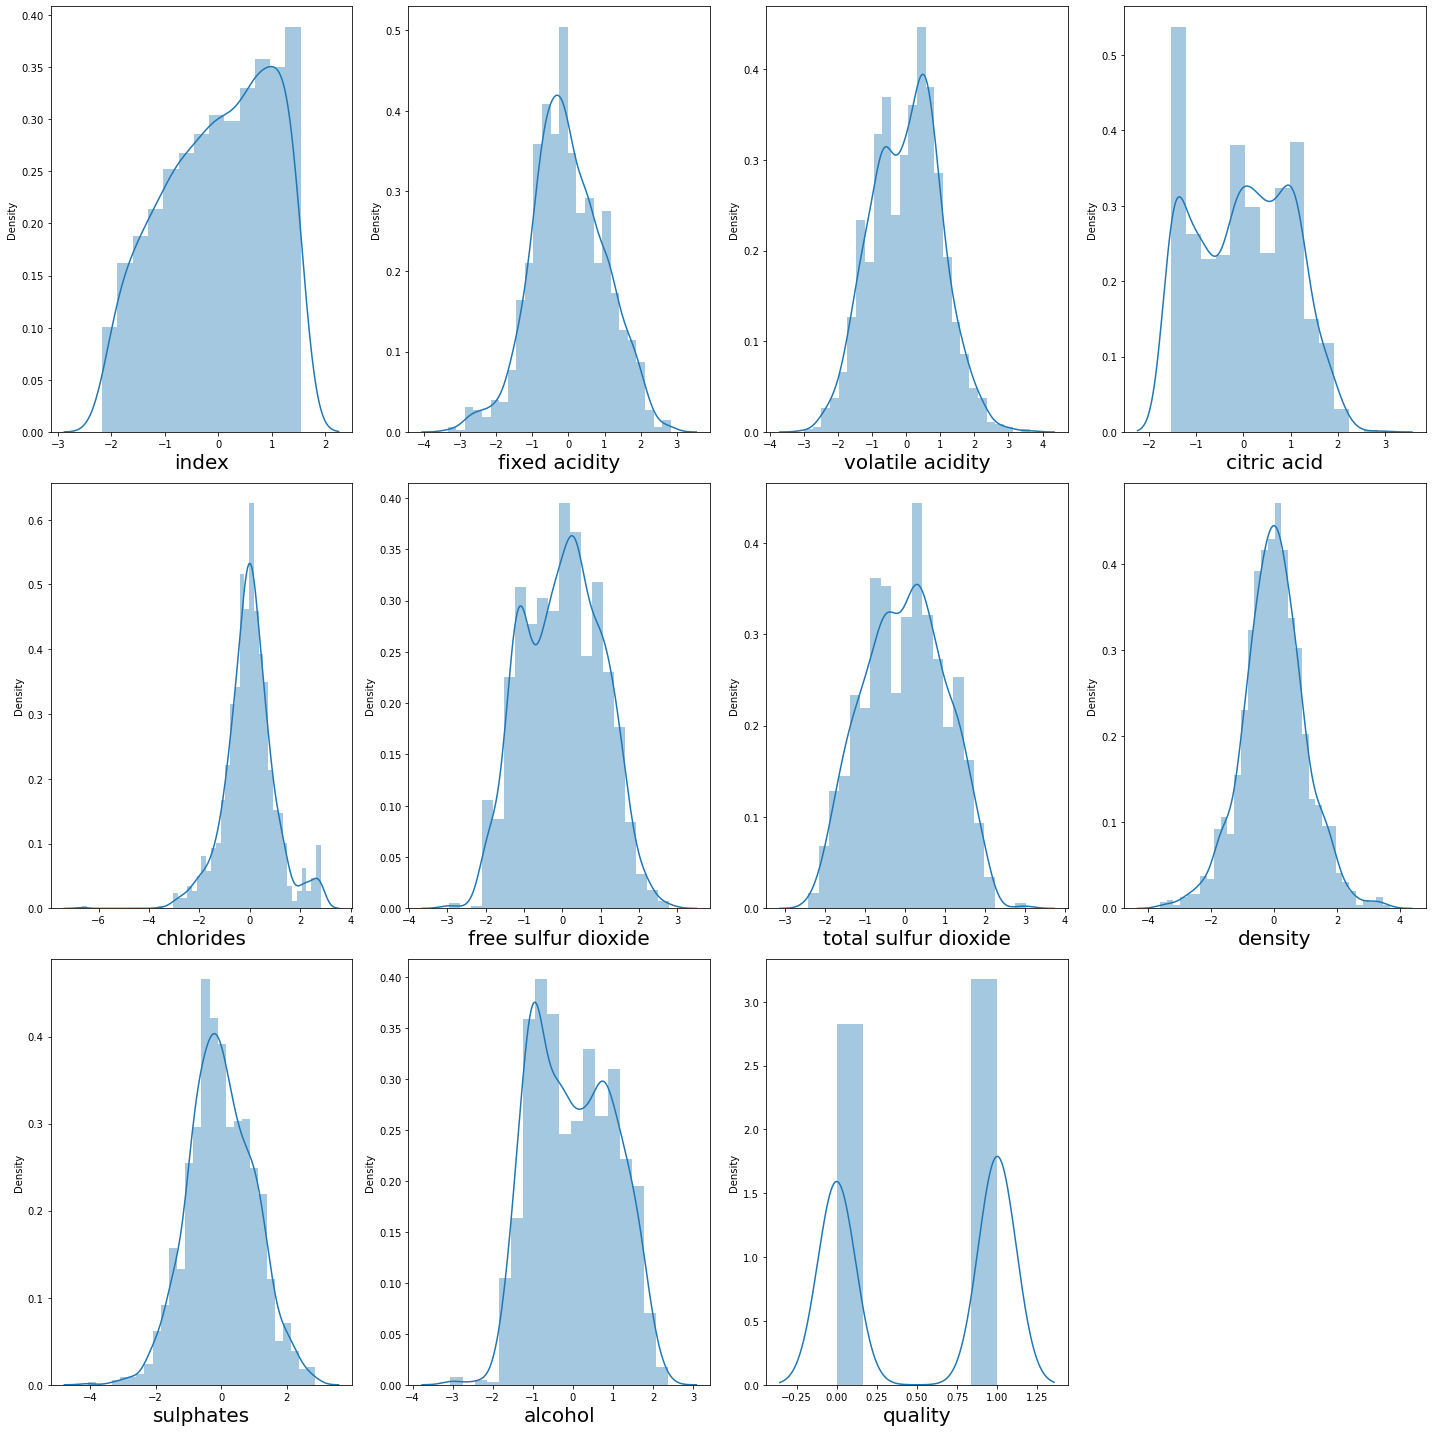

In [647]:
#Reching the skewness in the dataset through Distribution (Dist) Plot
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [648]:
#Data Summary (Checking data loss)
df.shape

(1359, 11)

In [685]:
#Drop index column due to reset_index
df = df.drop(columns = 'index')

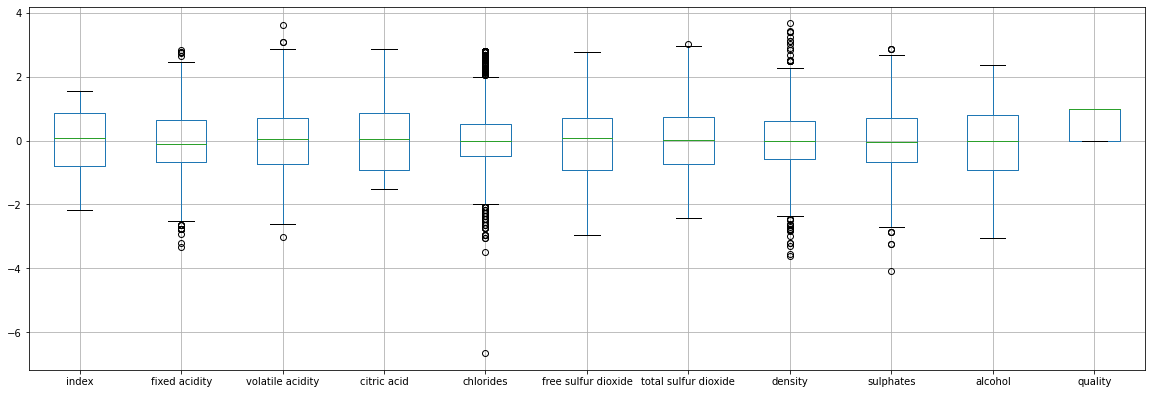

In [649]:
#Rechecking the outliers after power transformation (by using box plot)
df.boxplot(figsize=[20,8]) #plotting boxplot for first 30 columns 
plt.subplots_adjust(bottom=0.25)
plt.show()

In [650]:
#checking null values
df.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [651]:
#Using IQR method to reduce/delete outliers
from scipy.stats import iqr

In [652]:
#find the IQR
#1st Quantile
q1=df.quantile(0.25)
#3rd Quantile
q3=df.quantile(0.75)

iqr = q3-q1

In [653]:
#feature = density (outlier in higher side)
density_high = (q3.density+(1.5*iqr.density))
index=np.where(df['density']>density_high)
df=df.drop(df.index[index])
df.reset_index()

,level_0,index,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,0,-2.172483,-0.439412,0.978091,-1.530544,-0.166676,-0.269573,-0.128948,0.587781,-0.582775,-1.068157,0
1,1,-2.158567,-0.161475,1.720040,-1.530544,0.778512,0.992495,0.841796,0.054350,0.400130,-0.499290,0
2,2,-2.146733,-0.161475,1.242047,-1.256962,0.557116,0.192377,0.530012,0.161294,0.188379,-0.499290,0
3,3,-2.136076,1.529010,-1.551503,1.389613,-0.219369,0.384096,0.681966,0.694083,-0.391438,-0.499290,1
4,4,-2.116950,-0.439412,0.791661,-1.530544,-0.219369,-0.023152,0.100926,0.587781,-0.582775,-1.068157,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1337,1354,1.536234,-0.903672,0.596149,-0.996743,-0.616834,1.176074,0.028175,-0.100946,1.169880,-0.916248,1
1338,1355,1.537855,-1.436385,0.494776,-0.996743,0.477791,1.395040,0.236575,-0.968055,-0.391438,0.286561,0
1339,1356,1.539476,-1.733557,0.230050,-0.871292,-1.001198,1.724577,0.447853,-0.849072,0.878488,0.875408,1
1340,1357,1.542717,-1.733557,0.719444,-0.748774,-0.219369,1.395040,0.236575,-0.660104,0.593171,-0.021928,0


In [654]:
#feature = density (outlier in lower side)
density_low=(q1.density-(1.5*iqr.density))
index=np.where(df['density']<density_low)
df=df.drop(df.index[index])
df.reset_index()

,level_0,index,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,0,-2.172483,-0.439412,0.978091,-1.530544,-0.166676,-0.269573,-0.128948,0.587781,-0.582775,-1.068157,0
1,1,-2.158567,-0.161475,1.720040,-1.530544,0.778512,0.992495,0.841796,0.054350,0.400130,-0.499290,0
2,2,-2.146733,-0.161475,1.242047,-1.256962,0.557116,0.192377,0.530012,0.161294,0.188379,-0.499290,0
3,3,-2.136076,1.529010,-1.551503,1.389613,-0.219369,0.384096,0.681966,0.694083,-0.391438,-0.499290,1
4,4,-2.116950,-0.439412,0.791661,-1.530544,-0.219369,-0.023152,0.100926,0.587781,-0.582775,-1.068157,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1354,1.536234,-0.903672,0.596149,-0.996743,-0.616834,1.176074,0.028175,-0.100946,1.169880,-0.916248,1
1320,1355,1.537855,-1.436385,0.494776,-0.996743,0.477791,1.395040,0.236575,-0.968055,-0.391438,0.286561,0
1321,1356,1.539476,-1.733557,0.230050,-0.871292,-1.001198,1.724577,0.447853,-0.849072,0.878488,0.875408,1
1322,1357,1.542717,-1.733557,0.719444,-0.748774,-0.219369,1.395040,0.236575,-0.660104,0.593171,-0.021928,0


In [655]:
#feature = chlorides (outlier in higher side)
chlorides_high = (q3.chlorides+(1.5*iqr.chlorides))
index=np.where(df['chlorides']>chlorides_high)
df=df.drop(df.index[index])
df.reset_index()

,level_0,index,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,0,-2.172483,-0.439412,0.978091,-1.530544,-0.166676,-0.269573,-0.128948,0.587781,-0.582775,-1.068157,0
1,1,-2.158567,-0.161475,1.720040,-1.530544,0.778512,0.992495,0.841796,0.054350,0.400130,-0.499290,0
2,2,-2.146733,-0.161475,1.242047,-1.256962,0.557116,0.192377,0.530012,0.161294,0.188379,-0.499290,0
3,3,-2.136076,1.529010,-1.551503,1.389613,-0.219369,0.384096,0.681966,0.694083,-0.391438,-0.499290,1
4,4,-2.116950,-0.439412,0.791661,-1.530544,-0.219369,-0.023152,0.100926,0.587781,-0.582775,-1.068157,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1354,1.536234,-0.903672,0.596149,-0.996743,-0.616834,1.176074,0.028175,-0.100946,1.169880,-0.916248,1
1262,1355,1.537855,-1.436385,0.494776,-0.996743,0.477791,1.395040,0.236575,-0.968055,-0.391438,0.286561,0
1263,1356,1.539476,-1.733557,0.230050,-0.871292,-1.001198,1.724577,0.447853,-0.849072,0.878488,0.875408,1
1264,1357,1.542717,-1.733557,0.719444,-0.748774,-0.219369,1.395040,0.236575,-0.660104,0.593171,-0.021928,0


In [656]:
#feature = chlorides (outlier in lower side)
chlorides_low=(q1.chlorides-(1.5*iqr.chlorides))
index=np.where(df['chlorides']<chlorides_low)
df=df.drop(df.index[index])
df.reset_index()

,level_0,index,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,0,-2.172483,-0.439412,0.978091,-1.530544,-0.166676,-0.269573,-0.128948,0.587781,-0.582775,-1.068157,0
1,1,-2.158567,-0.161475,1.720040,-1.530544,0.778512,0.992495,0.841796,0.054350,0.400130,-0.499290,0
2,2,-2.146733,-0.161475,1.242047,-1.256962,0.557116,0.192377,0.530012,0.161294,0.188379,-0.499290,0
3,3,-2.136076,1.529010,-1.551503,1.389613,-0.219369,0.384096,0.681966,0.694083,-0.391438,-0.499290,1
4,4,-2.116950,-0.439412,0.791661,-1.530544,-0.219369,-0.023152,0.100926,0.587781,-0.582775,-1.068157,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1354,1.536234,-0.903672,0.596149,-0.996743,-0.616834,1.176074,0.028175,-0.100946,1.169880,-0.916248,1
1231,1355,1.537855,-1.436385,0.494776,-0.996743,0.477791,1.395040,0.236575,-0.968055,-0.391438,0.286561,0
1232,1356,1.539476,-1.733557,0.230050,-0.871292,-1.001198,1.724577,0.447853,-0.849072,0.878488,0.875408,1
1233,1357,1.542717,-1.733557,0.719444,-0.748774,-0.219369,1.395040,0.236575,-0.660104,0.593171,-0.021928,0


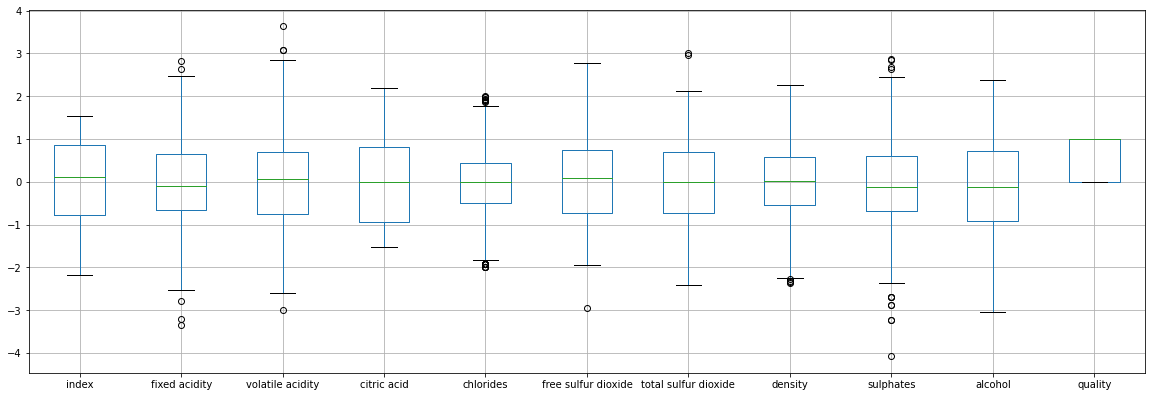

In [657]:
#Rechecking the outliers using boxplot after using IQR method
df.boxplot(figsize=[20,8]) #plotting boxplot for first 30 columns 
plt.subplots_adjust(bottom=0.25)
plt.show()

In [658]:
#chekcing the data loss post IQR
df.shape

(1235, 11)

In [659]:
#chekcing null values
df.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# DIVIDE DATA INTO FEATURES & LABEL

In [660]:
#Divide data set into features & label
y=df['quality']
X=df.drop(columns=['quality'])

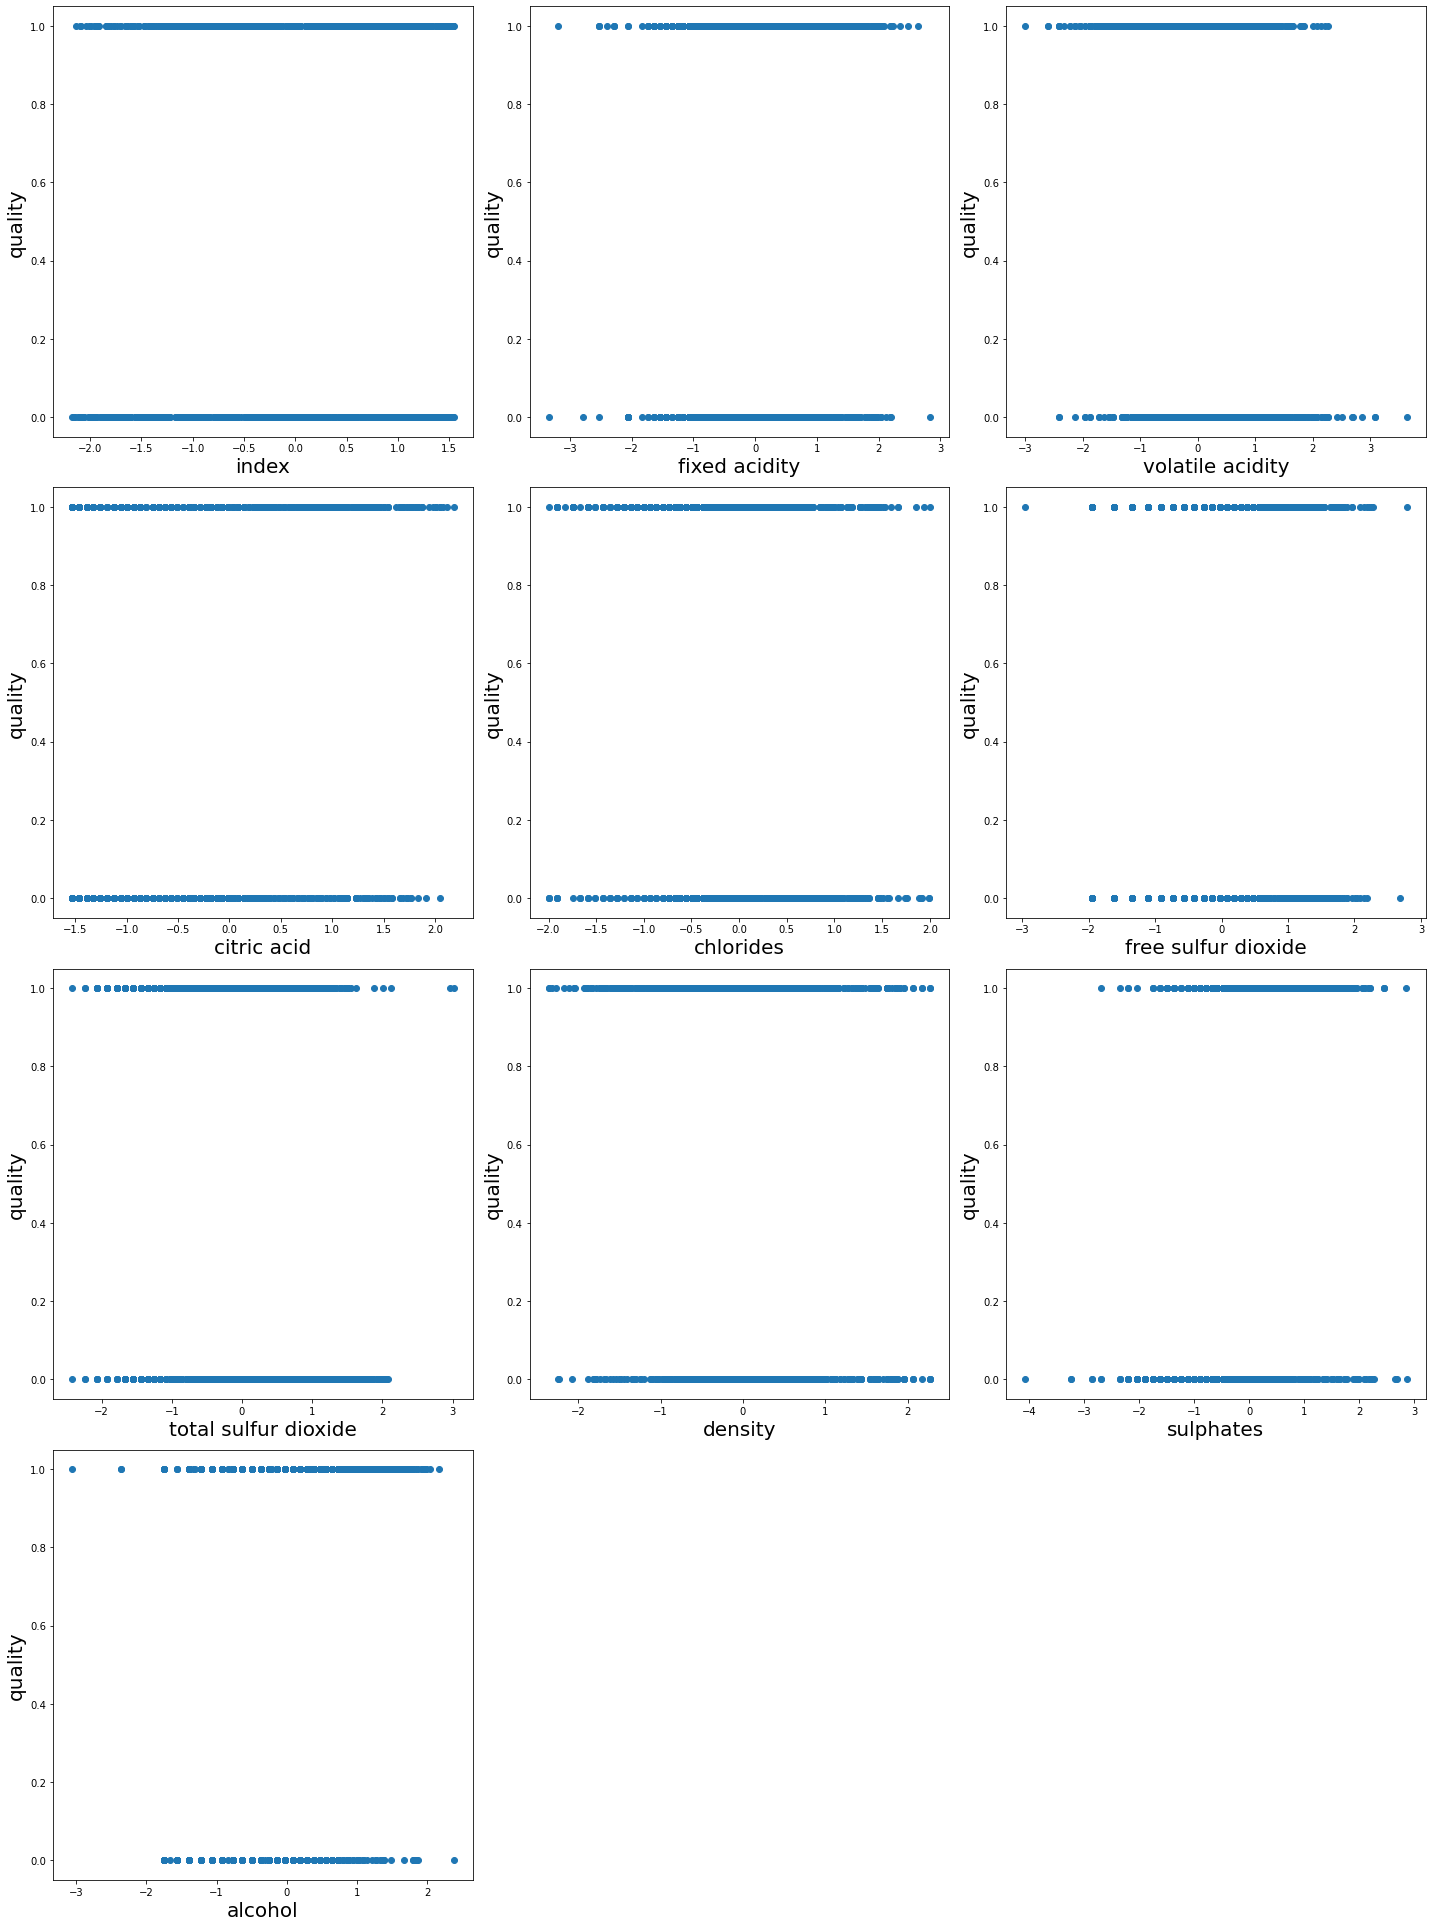

In [661]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=15: #double the features
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('quality', fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [662]:
#Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [663]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
	x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=i)
	LR = LogisticRegression()
	LR.fit(x_train,y_train)
	predrf=LR.predict(x_test)
	acc=accuracy_score(y_test,predrf)
	if acc>maxAccu:
		maxAccu=acc
		maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.7951482479784366 on Random State 59


In [664]:
#CREATING TRAIN-TEST SPLIT
x_train, x_test, y_train, y_test =  train_test_split(X_scaled, y, test_size=0.30, random_state=59)

# USING CLASSIFICATION MODELS & FINDING BEST FIT MODEL

In [665]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 79.51482479784366
[[139  39]
 [ 37 156]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       178
           1       0.80      0.81      0.80       193

    accuracy                           0.80       371
   macro avg       0.79      0.79      0.79       371
weighted avg       0.80      0.80      0.80       371



In [666]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Accuracy 67.9245283018868
[[117  61]
 [ 58 135]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       178
           1       0.69      0.70      0.69       193

    accuracy                           0.68       371
   macro avg       0.68      0.68      0.68       371
weighted avg       0.68      0.68      0.68       371



In [667]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_rf)*100)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy 78.97574123989219
[[141  37]
 [ 41 152]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       178
           1       0.80      0.79      0.80       193

    accuracy                           0.79       371
   macro avg       0.79      0.79      0.79       371
weighted avg       0.79      0.79      0.79       371



In [668]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_svc)*100)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy 81.6711590296496
[[151  27]
 [ 41 152]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       178
           1       0.85      0.79      0.82       193

    accuracy                           0.82       371
   macro avg       0.82      0.82      0.82       371
weighted avg       0.82      0.82      0.82       371



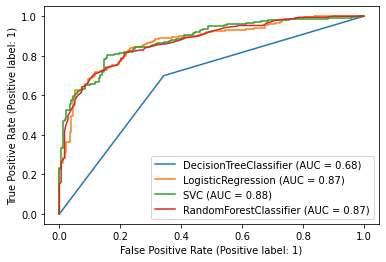

In [670]:
#PLOT THE ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.show()

In [671]:
#Logistic Regression, Random Forest and SVC are producing good accuracy. 
#Now we will check cross validation score as well for overfitting. 

In [672]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,X_scaled,y,cv=5)
print("Cross validation score of Logistic Regression Model", scr.mean())
scr2 = cross_val_score(rf,X_scaled,y,cv=5)
print("Cross validation score of Random Forest Model", scr2.mean())
scr3 = cross_val_score(dt,X_scaled,y,cv=5)
print("Cross validation score of Decision Tree Model", scr3.mean())
scr4 = cross_val_score(svc,X_scaled,y,cv=5)
print("Cross validation score of SVC Model", scr4.mean())

Cross validation score of Logistic Regression Model 0.7279352226720649
Cross validation score of Random Forest Model 0.6663967611336032
Cross validation score of Decision Tree Model 0.5838056680161944
Cross validation score of SVC Model 0.7222672064777328


In [673]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C': np.arange(0.001,10,0.1),
				'gamma': np.arange(0.1,1,0.1)
			}
gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 0.201, 'gamma': 0.1}

In [674]:
svc = SVC(C=0.3, gamma=0.2)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
cfm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       178
           1       0.84      0.79      0.81       193

    accuracy                           0.81       371
   macro avg       0.81      0.81      0.81       371
weighted avg       0.81      0.81      0.81       371



In [675]:
GCV = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with best parameters
accuracy_score(y_test,GCV_pred) #checking final accuracy


0.8059299191374663

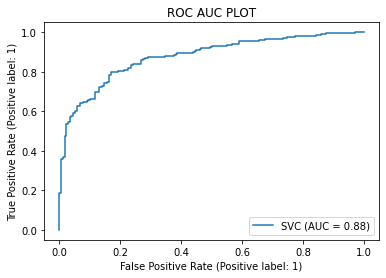

In [676]:
#ROC AUC PLOT
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC PLOT")
plt.show()

In [677]:
#Final accuracy is 81% and AUC Score is 88% which is pretty good

# SAVING THE MODEL

In [678]:
#SAVING THE MODEL IN PICKLE FORMAT
#PICKELING OF A FILE OR SERIALIZATION OF A FILE
import joblib
joblib.dump(GCV.best_estimator_,"Winequality.pkl")


['Winequality.pkl']